# Minu esimese taseme pealkiri

## Teise taseme pealkiri

Tavaline tekst

Link https://www.markdownguide.org

(0.0, 1616899.6)

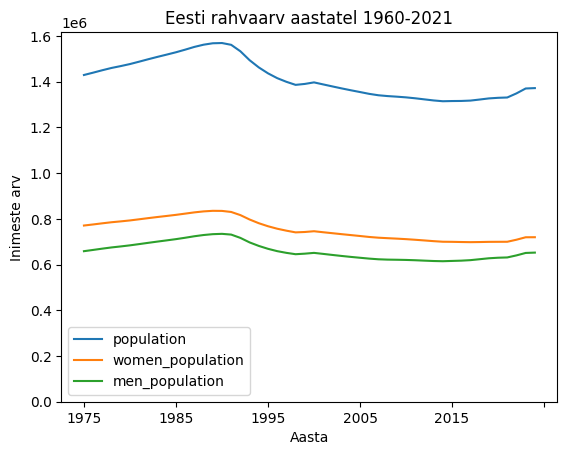

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# url = "https://demo-datahub.rik.ee/api/v1/meta/classifications"

url_riik = 'https://api.worldbank.org/v2/countries/EST/?format=json'
url_rahvastik_ = 'https://api.worldbank.org/v2/country/EST/indicator/SP.POP.TOTL?format=json'
url_women = "https://api.worldbank.org/v2/country/EST/indicator/SP.POP.TOTL.FE.IN?format=json"

response = requests.get(url_rahvastik_)
data = response.json()

response_woman = requests.get(url_women)
data_woman = response_woman.json()


# json dumps muudab väljundi terminalis loetavaks
# print(json.dumps(data, indent=2, ensure_ascii=False))

values = {'year': [], 'population': [], 'women_population': []}

# {"year": ["2021", "2020", "2019", ...], "population": [1331057, 1326535, 1324820, ...]}

for item in data[1]:
    values['year'].append(item['date'])
    values['population'].append(item['value'])

for women in data_woman[1]:
    values['women_population'].append(women['value'])

df = pd.DataFrame(values)

df = df.sort_values(by='year')  # sorteerin aasta järgi kasvavalt

df['men_population'] = df['population'] - df['women_population']


# joonistamise osa
df.plot(x='year', y=['population', 'women_population', 'men_population'], kind='line',
        title='Eesti rahvaarv aastatel 1960-2021', xlabel='Aasta', ylabel='Inimeste arv')
plt.ylim(bottom=0)  # y telje algus

## Müüginäitajad

-  Teeme mõned group by kasutades dataframe (pie)

   SaleID        Date CustomerID ProductID  Quantity  UnitPrice  Discount  \
0  S00001  2023-01-31       C004      P004         5      56.81      0.10   
1  S00002  30.12.2023       C001      P005         7      98.78      0.15   
2  S00003  2022-05-10       C001      P006         3      97.12      0.15   
3  S00004  2023-07-18       C003      P002         9      47.33      0.05   
4  S00005  2023-02-04       C004      P001         4      71.67      0.15   

  SalesRepID RegionID_x CustomerName    Industry Country RegionID_y    Amount  
0       SR02        R03  Delta Group      Retail      UK        R03  255.6450  
1       SR01        R01    Alice Ltd      Retail     USA        R01  587.7410  
2       SR01        R01    Alice Ltd      Retail     USA        R01  247.6560  
3       SR01        R01  Charlie LLC  E-commerce     USA        R01  404.6715  
4       SR02        R03  Delta Group      Retail      UK        R03  243.6780  


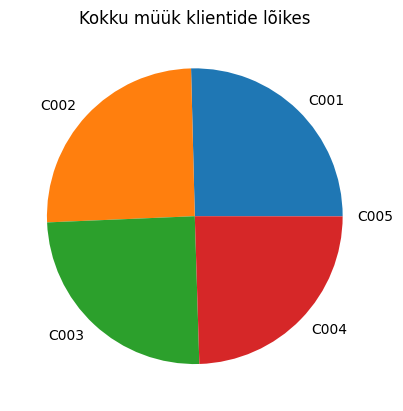

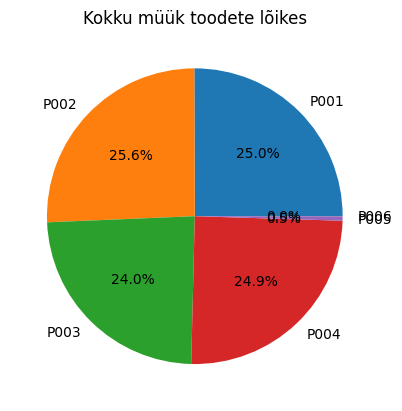

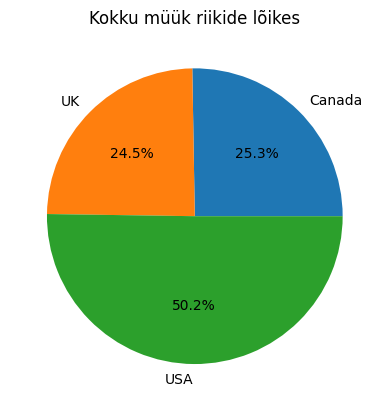

         Quantity  UnitPrice  Discount       Amount
Country                                            
Canada      14806  163011.82    220.35   766877.643
UK          14690  162476.06    222.50   743518.923
USA         29793  324206.22    441.75  1524546.017


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

sale_dat_url = '/Users/vaga_vesi/Projects/andmetarkus2025/andmetarkus/day-2/ANALYSIS/input/SalesTable.csv'
customer_data_url = '/Users/vaga_vesi/Projects/andmetarkus2025/andmetarkus/day-2/ANALYSIS/input/CustomerTable.csv'

sales_data = pd.read_csv(sale_dat_url)
customer_data = pd.read_csv(customer_data_url)

merged_data = pd.merge(sales_data, customer_data, on='CustomerID', how='left')
merged_data['Amount'] = merged_data['Quantity'] * merged_data['UnitPrice'] * (1- merged_data['Discount'])

grouped_by_customerID = merged_data.groupby('CustomerID').sum(numeric_only=True)
grouped_by_customerID.plot(y='Amount', kind='pie', title='Kokku müük klientide lõikes', ylabel='', legend=False)    
plt.show()

grouped_by_productID = merged_data.groupby('ProductID').sum(numeric_only=True)
grouped_by_productID.plot(y='Amount', kind='pie', title='Kokku müük toodete lõikes', ylabel='', legend=False, autopct='%1.1f%%')

plt.show()

grouped_by_country = merged_data.groupby('Country').sum(numeric_only=True)
grouped_by_country.plot(y='Amount', kind='pie', title='Kokku müük riikide lõikes', ylabel='', legend=False, autopct='%1.1f%%')
plt.show()

# print(grouped_by_country.head())


